# 情感分析-高级-时间序列

### 工作步骤
+ 1 能够知道如何处理excel文件
+ 2 怎么用snownlp处理一句话的情感，生成情感值
+ 3 如何批量的按行、快速生成每行文本的情感值  .apply
+ 4 怎么把情感的趋势线画出来

In [1]:
import pandas as pd # pandas用来处理表格数据的工具包

In [2]:
df = pd.read_excel("restaurant-comments.xlsx")

In [3]:
df.head()

,comments,date
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00


In [4]:
text = df.comments.iloc[0]  # iloc是索引（用来定位到指定的位置），这里就是第一条评论文本

In [5]:
text

'这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩啊！！新出的红皮土豆也好好吃，还有炸酥肉，秒杀任何火锅店啊！服务员太可爱，告诉我们半份豆花是4块儿，一份豆花是6块儿，点两个半份比较合适，太实在了哈哈哈，每次妈妈说开心果好吃服务员都给我们打包带走??希望A餐厅早日出咖喱锅，期待ing……'

In [6]:
from snownlp import SnowNLP

In [7]:
s = SnowNLP(text)

In [8]:
s.sentiments

0.4244401030222834

情感分析数值可以正确计算。在此基础上，我们需要定义函数，以便批量处理所有的评论信息。

In [9]:
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments  # snownlp是通用的，就没那么准确

然后，我们利用Python里面强大的apply语句，来一次性处理所有评论，并且将生成的情感数值在数据框里面单独存为一列，称为sentiment。

In [10]:
df["sentiments"] = df.comments.apply(get_sentiment_cn)  #这行代码很有意思！

In [11]:
df.head(100)

,comments,date,sentiments
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00,4.244401e-01
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00,4.506914e-01
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00,1.000000e+00
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00,1.182003e-01
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00,8.712261e-01
5,A餐厅是我们的定点单位，单位大聚小聚都来这，所以享受VIP待遇，来了不用等位。这的菜品新鲜，...,2017-05-05 16:00:00,9.980202e-01
6,这两天风特别大，家里也没什么可吃的，外卖也不知道吃什么！又懒得出去，发现好久没吃火锅啦！灵机...,2017-04-22 16:00:00,9.820584e-01
7,A餐厅真的是天津每一个店我都来过无数次了！<br>今天觉得我拍的图很好看hhhh于是就来发条...,2017-05-20 16:00:00,6.392747e-03
8,今天又来到新开路的A餐厅，食材还是非常新鲜，羔羊肉味道鲜美，墨鱼滑味道新鲜！我们一家三口吃的...,2017-05-12 16:00:00,4.267672e-02
9,服务态度一如既往的好，看我东西多，主动帮忙提东西，所有的服务员都主动打招呼，非常热情。我点的...,2017-05-07 16:00:00,6.235047e-01


新的列sentiment已经生成。我们之前介绍过，SnowNLP的结果取值范围在0到1之间，代表了情感分析结果为正面的可能性。通过观察前几条数据，我们发现点评网站上，顾客对这家分店评价总体上还是正面的，而且有的评论是非常积极的。

但是少量数据的观察，可能造成我们结论的偏颇。我们来把所有的情感分析结果数值做一下平均。使用mean()函数即可。

In [12]:
df.sentiments.mean()

0.6987503312852683

整体接近0.7，正面。我们再来看看中位数值，使用的函数为median()。

In [13]:
df.sentiments.median()

0.9270364310550024

我们需要使用ggplot绘图工具包。这个工具包原本只在R语言中提供，让其他数据分析工具的用户羡慕得流口水。幸好，后来它很快被移植到了Python平台。

我们从ggplot中引入绘图函数，并且让Jupyter Notebook可以直接显示图像。

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\App\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [15]:
from ggplot import *

下面我们绘制图形。这里你可以输入下面这一行语句。

In [16]:
pic1 = ggplot(aes(x="date", y="sentiments"), data=df) + geom_point() + geom_line(color = 'red') + scale_x_date(labels = date_format("%Y-%m-%d"))

D:\App\anaconda3\lib\site-packages\ggplot\geoms\geom_point.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)
D:\App\anaconda3\lib\site-packages\ggplot\ggplot.py:232: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(labels)


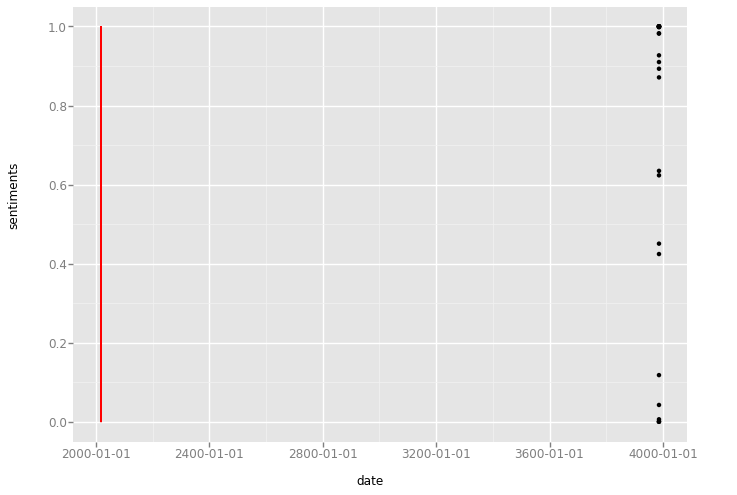

<ggplot: (159521843800)>

In [17]:
pic1

D:\App\anaconda3\lib\site-packages\ggplot\geoms\geom_point.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_ticks)
D:\App\anaconda3\lib\site-packages\ggplot\ggplot.py:232: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(labels)


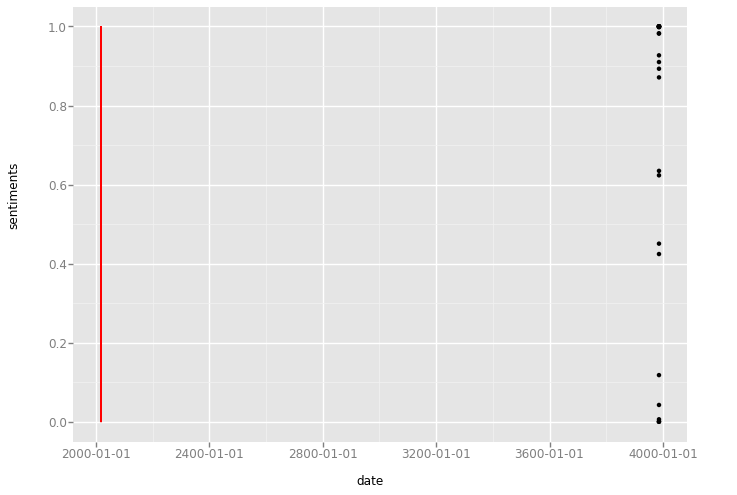

In [18]:
# 怎么保存出的图？
pic1.save('time_line.jpg')

你可以看到ggplot的绘图语法是多么简洁和人性化。只需要告诉Python自己打算用哪个数据框，从中选择哪列作为横轴，哪列作为纵轴，先画点，后连线，并且可以指定连线的颜色。然后，你需要让X轴上的日期以何种格式显示出来。所有的参数设定跟自然语言很相似，直观而且易于理解。

在图中，我们发现许多正面评价情感分析数值极端的高。同时，我们也清晰地发现了那几个数值极低的点。对应评论的情感分析数值接近于0。这几条评论，被Python判定为基本上没有正面情感了。

从时间上看，最近一段时间，几乎每隔几天就会出现一次比较严重的负面评价。

作为经理，你可能如坐针毡。希望尽快了解发生了什么事儿。你不用在数据框或者Excel文件里面一条条翻找情感数值最低的评论。Python数据框Pandas为你提供了非常好的排序功能。假设你希望找到所有评论里情感分析数值最低的那条，可以这样执行：

In [19]:
df.sort_values(['sentiments'])[:1]

,comments,date,sentiments
24,这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人...,2017-02-20 16:00:00,6.334066e-08


情感分析结果数值几乎就是0啊！不过这里数据框显示评论信息不完全。我们需要将评论整体打印出来。

In [20]:
print(df.sort_values(['sentiments']).iloc[0].comments)

这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人都多，所以特意错开，这次实在是馋A餐厅了，所以赶在正日子也出来了，从下午四点多的时候我看排号就排到一百多了，我从家开车过去得堵的话一个小时，我一看提前两个小时就在网上先排着号了，差不多我们是六点半到的，到那的时候我看号码前面还有才三十多号，我想着肯定没问题了，等一会就能吃上的，没想到悲剧了，就从我们到那坐到等位区开始，大约是十分二十分一叫号，中途多次我都想走了，哈哈，哎，等到最后早上九点才吃上的，服务员感觉也没以前清闲时周到了，不过这肯定的，一人负责好几桌，今天节日这么多人，肯定是很累的，所以大多也都是我自己跑腿，没让服务员给弄太多，就虾滑让服务员下的，然后环境来说感觉卫生方面是不错，就是有些太吵了，味道还是一如既往的那个味道，不过A餐厅最人性化的就是看我们等了两个多小时，上来送了我们一张打折卡，而且当次就可以使用，这点感觉还是挺好的，不愧是A餐厅，就是比一般的要人性化，不过这次就是选错日子了，以后还是得提前预约，要不就别赶节日去，太火爆了！


## 分析

+ 通过阅读，你可以发现这位顾客确实有了一次比较糟糕的体验——等候的时间太长了，以至于使用了“悲剧”一词；另外还提及服务不够周到，以及环境吵闹等因素。正是这些词汇的出现，使得分析结果数值非常低。
+ 好在顾客很通情达理，而且对该分店的人性化做法给予了正面的评价。
+ 从这个例子，你可以看出，虽然情感分析可以帮你自动化处理很多内容，然而你不能完全依赖它。
+ 自然语言的分析，不仅要看表达强烈情感的关键词，也需要考虑到表述方式和上下文等诸多因素。这些内容，是现在自然语言处理领域的研究前沿。我们期待着早日应用到科学家们的研究成果，提升情感分析的准确度。
+ 不过，即便目前的情感分析自动化处理不能达到非常准确，却依然可以帮助你快速定位到那些可能有问题的异常点(anomalies)。从效率上，比人工处理要高出许多。
+ 你读完这条评论，长出了一口气。总结了经验教训后，你决定将人性化的服务贯彻到底。你又想到，可以收集用户等候时长数据，用数据分析为等待就餐的顾客提供更为合理的等待时长预期。这样就可以避免顾客一直等到很晚了。
+ 祝贺你，经理！在数据智能时代，你已经走在了正确的方向上。